### M4 T01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### - Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.


In [2]:
lloguer_data = pd.read_csv('preu lloguer per trimestre i barri.csv') # carreguem les dades per l'exercici

In [3]:
lloguer_data.head() # mostra les primeres columnes

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [4]:
print(lloguer_data.dtypes) # Això ens mostra el tipus de dades que tenim a cada columna

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object


### Problema
El preu hauria de ser un valor numéric, de tipus float, i ho ha interpretat com un objecte. Hem de canviar el tipus de valor de la columna 'Preu'. Alguns dels preus no estan especificats i es mostren com '--'. Fem servi l'argument 'coerce' per forçar el canvi.

In [5]:
lloguer_data["Preu"] = pd.to_numeric(lloguer_data["Preu"], errors='coerce')

print(lloguer_data.dtypes)
# Així veiem que ara la columna 'Preu' es de tipus float

Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


In [6]:
lloguer_data.sort_values(by=['Preu'], ascending = False)
# Al ordenar els valors veiem que els valor no numerics han estat convertits a NaN

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
312,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1816.5
166,2021,2,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1680.3
458,2021,4,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1679.3
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2
461,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1597.4
...,...,...,...,...,...,...,...,...
522,2021,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà per superfície (Euros/m2 mes),NaN
552,2021,4,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
557,2021,4,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
564,2021,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [7]:
# fem una petita estadística descriptiva. Creem una funció per tal de diferenciar els valors tipus objecte del valors numerics
# Als valors tipus objecte ens dona el recompte dels diferents valors posibles
# Als valor nuèrics ens dona el valor mitjà, la desviació estàndard, el mínim i el màxim

def stats_gral2():
    nom_columnes = lloguer_data.columns.values.tolist()
    for colum in nom_columnes:
        if lloguer_data[colum].dtype == object:
            print(colum,' es de tipus object')
            print(lloguer_data[colum].value_counts(dropna=True))
            print('------') 
        else:
            print(colum,' es de tipus numeric, (int o float)')
            print('    -> Promig + desv est: ',lloguer_data[colum].mean(),'+',lloguer_data[colum].std())
            print('    -> Max: ', lloguer_data[colum].max(),' i min: ', lloguer_data[colum].min())
            print('------')       

stats_gral2()

Any  es de tipus numeric, (int o float)
    -> Promig + desv est:  2021.0 + 0.0
    -> Max:  2021  i min:  2021
------
Trimestre  es de tipus numeric, (int o float)
    -> Promig + desv est:  2.5 + 1.1189924406950933
    -> Max:  4  i min:  1
------
Codi_Districte  es de tipus numeric, (int o float)
    -> Promig + desv est:  6.2465753424657535 + 2.790726234715045
    -> Max:  10  i min:  1
------
Nom_Districte  es de tipus object
Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64
------
Codi_Barri  es de tipus numeric, (int o float)
    -> Promig + desv est:  37.0 + 21.089371210270752
    -> Max:  73  i min:  1
------
Nom_Barri  es de tipus object
el Raval                                 8
la Teixonera                             8
Torr

### Sobre el resultats anterior
El valor promig del preu no te molt sentit perque es barrejen dos conceptes:
el 'Lloguer mitjà mensual (Euros/mes)' i el 'Lloguer mitjà per superfície (Euros/m2 mes)'
Ho calculem per separat.

In [8]:
#Aqui calculem el preu mitja, desviació estàndard, mínim i màxim, separant lloguer mitjà i lloguer mitjà per m2
print('---Mitja aritmetica dels preu')
print(lloguer_data.groupby('Lloguer_mitja')['Preu'].mean())
print('---Desviacio estàndard dels preu')
print(lloguer_data.groupby('Lloguer_mitja')['Preu'].std())
print('---Màxim')
print(lloguer_data.groupby('Lloguer_mitja')['Preu'].max())
print('---Mínim')
print(lloguer_data.groupby('Lloguer_mitja')['Preu'].min())

---Mitja aritmetica dels preu
Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              871.593704
Lloguer mitjà per superfície (Euros/m2 mes)     12.720741
Name: Preu, dtype: float64
---Desviacio estàndard dels preu
Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              221.192799
Lloguer mitjà per superfície (Euros/m2 mes)      1.701480
Name: Preu, dtype: float64
---Màxim
Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              1816.5
Lloguer mitjà per superfície (Euros/m2 mes)      18.0
Name: Preu, dtype: float64
---Mínim
Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              447.5
Lloguer mitjà per superfície (Euros/m2 mes)      6.7
Name: Preu, dtype: float64


### Vull dividir l'analisi entre el preu mitjà i el preu mitjà per m2.
Faig 2 dataframes, cadascú amb un tipus de dades
No puc fer plots combinats per què els valors son molt differents (cent cops més grans: 1800 vs. 18) 

In [9]:
# Fem un segon dataframe amb només els valors dels preus totals
lloguer_data_total = lloguer_data.drop(lloguer_data[(lloguer_data['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')].index)
lloguer_data_total.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [10]:
# I fem un tercer dataframe amb els valors per m2
lloguer_data_m2 = lloguer_data.drop(lloguer_data[(lloguer_data['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)')].index)
lloguer_data_m2.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9


### Ara ja tenim les dades preparades per les visualitzacions

### - Exercici 1

Crea almenys una visualització per:

    Una variable categòrica (Districte o Barri)

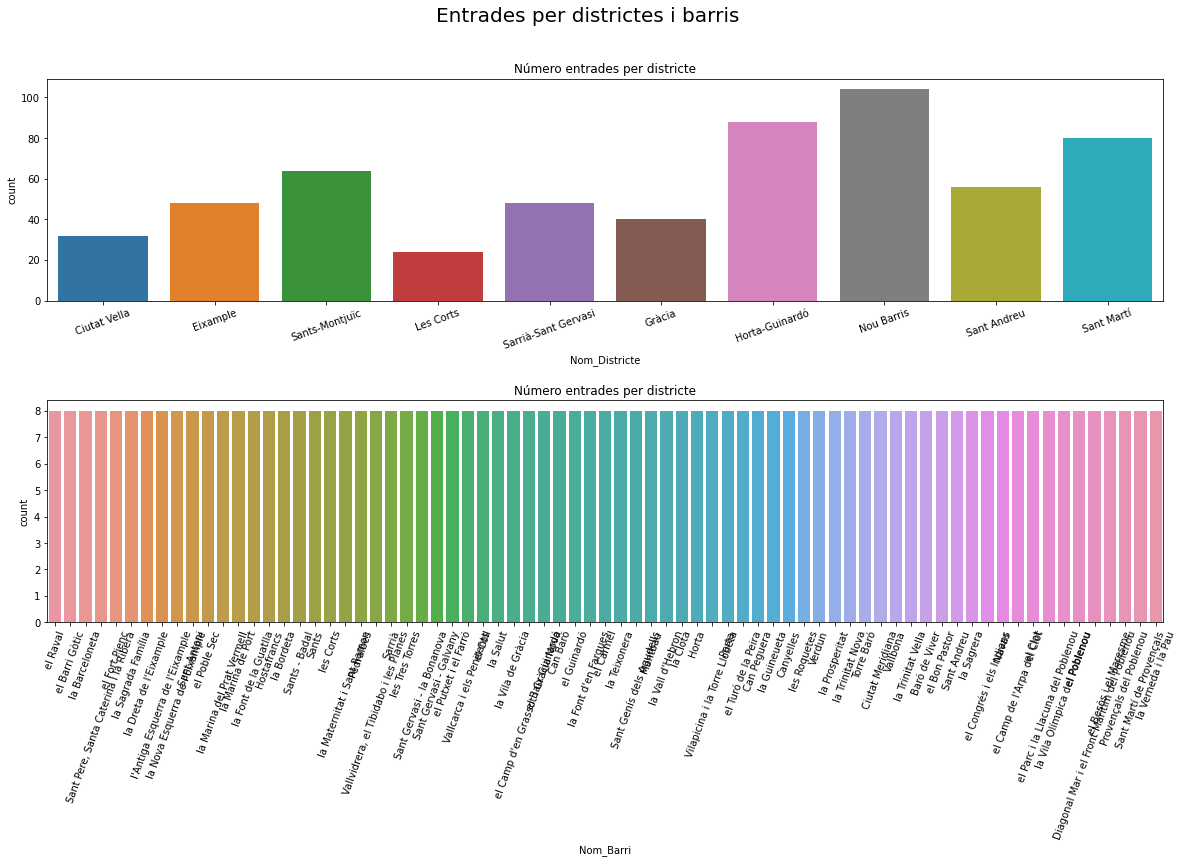

In [11]:
# Mostrarem el número de vegades que hi ha dades per districte i per barri
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)
plt.suptitle("Entrades per districtes i barris", size = 20)

plt.subplot(2,1,1)
sns.countplot(x = 'Nom_Districte', data = lloguer_data)
plt.xticks(rotation = 20)
plt.title('Número entrades per districte')

plt.subplot(2,1,2)
plt.xticks(rotation = 70)
sns.countplot(x = 'Nom_Barri', data = lloguer_data)
plt.title('Número entrades per districte');

### - Exercici 1

Crea almenys una visualització per:

    Una variable numèrica (Preu)

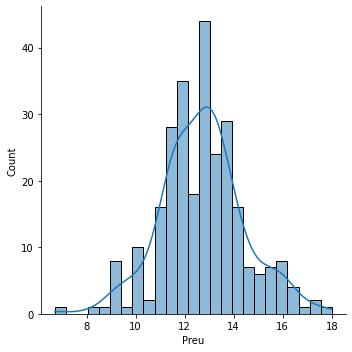

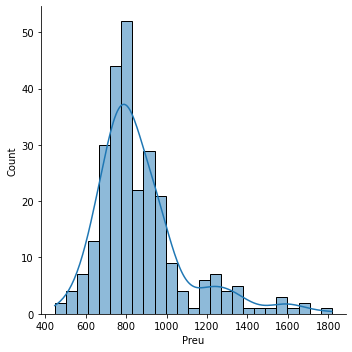

In [12]:
# Fem uns histogrames, que ens mostra la distribucions dels preus, per m2 i total

sns.displot(lloguer_data_m2['Preu'], kde = True, bins = 25)

sns.displot(lloguer_data_total['Preu'], kde = True, bins = 25)

### - Exercici 1

Crea almenys una visualització per:

    Una variable numèrica i una categòrica (Districte i Preu)

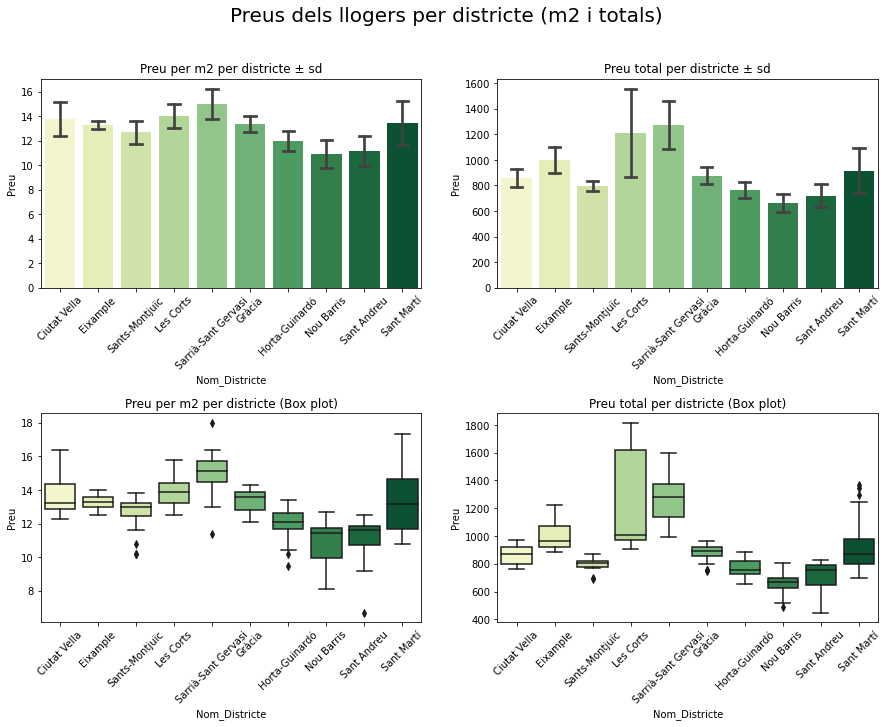

In [13]:
# Ho farem en una figura amb 4 subplots
# A dalt ho mostrarem amb barres i la seva desviació estàndard
# A la fila de sota ho farem amb boxplot

plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.6)
plt.suptitle("Preus dels llogers per districte (m2 i totals)", size = 20)

plt.subplot(2,2,1)
plt.xticks(rotation = 45)
sns.barplot(x = 'Nom_Districte', y = 'Preu', data = lloguer_data_m2, ci='sd', capsize=.3, palette = 'YlGn')
plt.title('Preu per m2 per districte ± sd')

plt.subplot(2,2,2)
plt.xticks(rotation = 45)
sns.barplot(x = 'Nom_Districte', y = 'Preu', data = lloguer_data_total, ci='sd', capsize=.3, palette = 'YlGn')
plt.title('Preu total per districte ± sd')

plt.subplot(2,2,3)
sns.boxplot(x = 'Nom_Districte', y = 'Preu', data = lloguer_data_m2, palette = 'YlGn')
plt.legend([],[], frameon=False)
plt.xticks(rotation = 45)
plt.title('Preu per m2 per districte (Box plot)')

plt.subplot(2,2,4)
sns.boxplot(x = 'Nom_Districte', y = 'Preu', data = lloguer_data_total, palette = 'YlGn')
plt.legend([],[], frameon=False)
plt.xticks(rotation = 45)
plt.title('Preu total per districte (Box plot)');


### - Exercici 1

Crea almenys una visualització per:

    Dues variables numèriques (Any o Trimestre i Preu)

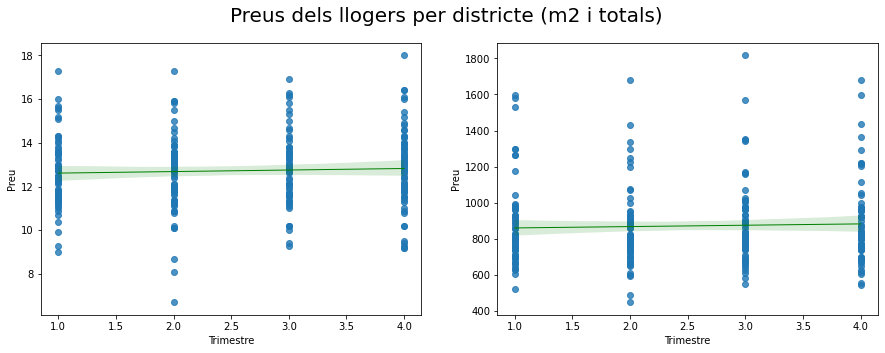

In [14]:
# Fem un gràfic de dispersió amb la línea de regressió
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.6)
plt.suptitle("Preus dels llogers per districte (m2 i totals)", size = 20)

plt.subplot(1,2,1)
sns.regplot(x='Trimestre', y = 'Preu', data = lloguer_data_m2, line_kws = {'lw': 1, 'color': 'green'})

plt.subplot(1,2,2)
sns.regplot(x='Trimestre', y = 'Preu', data = lloguer_data_total, line_kws = {'lw': 1, 'color': 'green'});

# El resultat no te massa sentit perqué el trimestres només poden agafar valors sencers entre 1 i 4

### - Exercici 1

Crea almenys una visualització per:

    Tres variables (Barri o Districte, Trimestre i Preu)

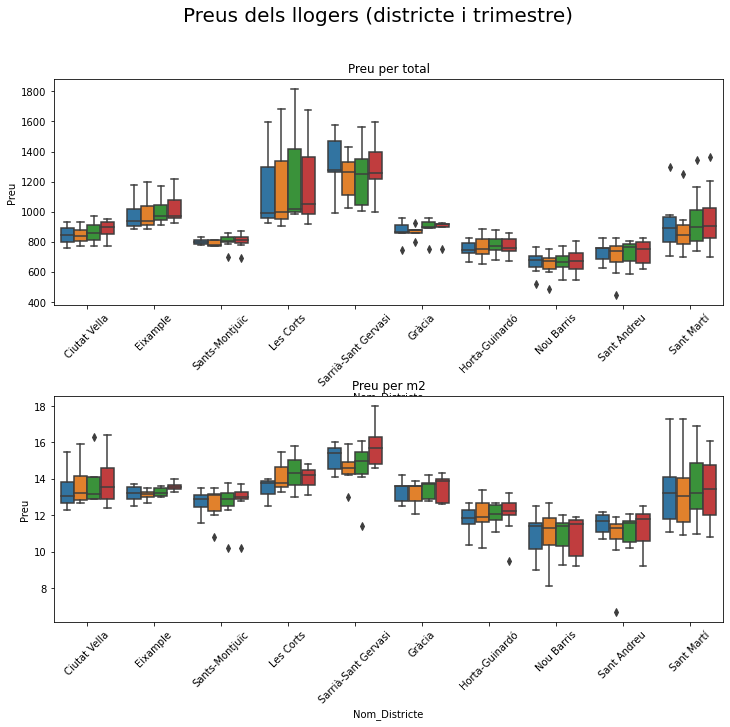

In [38]:
plt.figure(figsize = (12,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.4)
plt.suptitle("Preus dels llogers (districte i trimestre)", size = 20)

plt.subplot(2,1,1)
sns.boxplot(x='Nom_Districte', y='Preu', hue='Trimestre', 
               data=lloguer_data_total[lloguer_data_total.Preu > 245])
plt.title('Preu per total')
plt.xticks(rotation = 45)
plt.legend([],[], frameon=False)

plt.subplot(2,1,2)
sns.boxplot(x='Nom_Districte', y='Preu', hue='Trimestre', 
               data=lloguer_data_m2[lloguer_data_m2.Preu < 245])
plt.title('Preu per m2')
plt.xticks(rotation = 45)
plt.legend([],[], frameon=False);

In [15]:

# Podem mostrar tres variables fente servit un heatmap, de manera que els districtes i els trimestres es mostrin als eixos
# Els valors dels preus es mostraran per l'intensitat del color
# Convertim els data frames en matrius per fer els heatmap
lloguer_data_m2_mx = lloguer_data_m2.pivot_table(index = 'Nom_Districte', columns = 'Trimestre', values = 'Preu')
lloguer_data_total_mx = lloguer_data_total.pivot_table(index = 'Nom_Districte', columns = 'Trimestre', values = 'Preu')

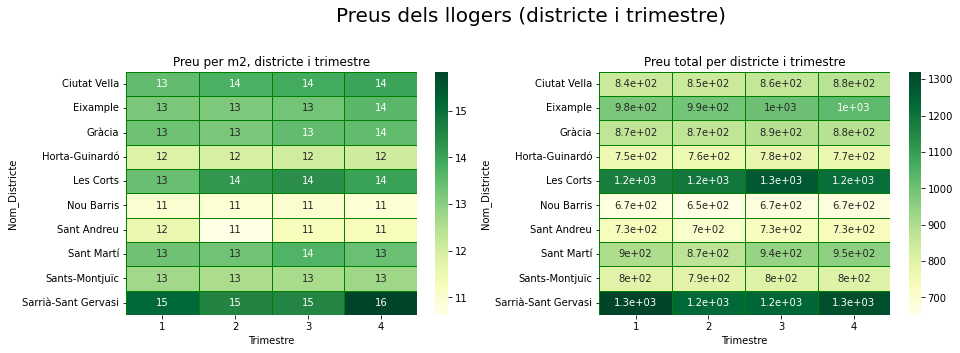

In [16]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=.8, wspace=.3, hspace=None)
plt.suptitle("Preus dels llogers (districte i trimestre)", size = 20)

plt.subplot(1,2,1)
sns.heatmap(lloguer_data_m2_mx, annot = True, cmap = 'YlGn', linecolor='green', linewidth = .8)
plt.title('Preu per m2, districte i trimestre')

plt.subplot(1,2,2)
sns.heatmap(lloguer_data_total_mx, annot = True, cmap = 'YlGn', linecolor='green', linewidth = .8)
plt.title('Preu total per districte i trimestre');

### - Exercici 2

Exporta els gràfics com imatges o com HTML.

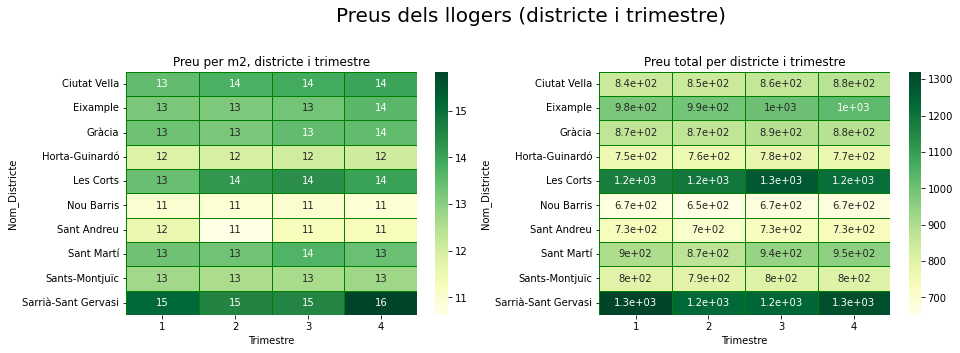

In [17]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=.8, wspace=.3, hspace=None)
plt.suptitle("Preus dels llogers (districte i trimestre)", size = 20)

plt.subplot(1,2,1)
sns.heatmap(lloguer_data_m2_mx, annot = True, cmap = 'YlGn', linecolor='green', linewidth = .8)
plt.title('Preu per m2, districte i trimestre')

plt.subplot(1,2,2)
sns.heatmap(lloguer_data_total_mx, annot = True, cmap = 'YlGn', linecolor='green', linewidth = .8)
plt.title('Preu total per districte i trimestre')

plt.savefig("heatmap_lloguer.pdf", dpi=150)
plt.savefig("heatmap_lloguer.eps", dpi=150)
plt.savefig("heatmap_lloguer.png", dpi=150);

### - Exercici 3

Proposa alguna visualització que creguis que pot resultar interessant.

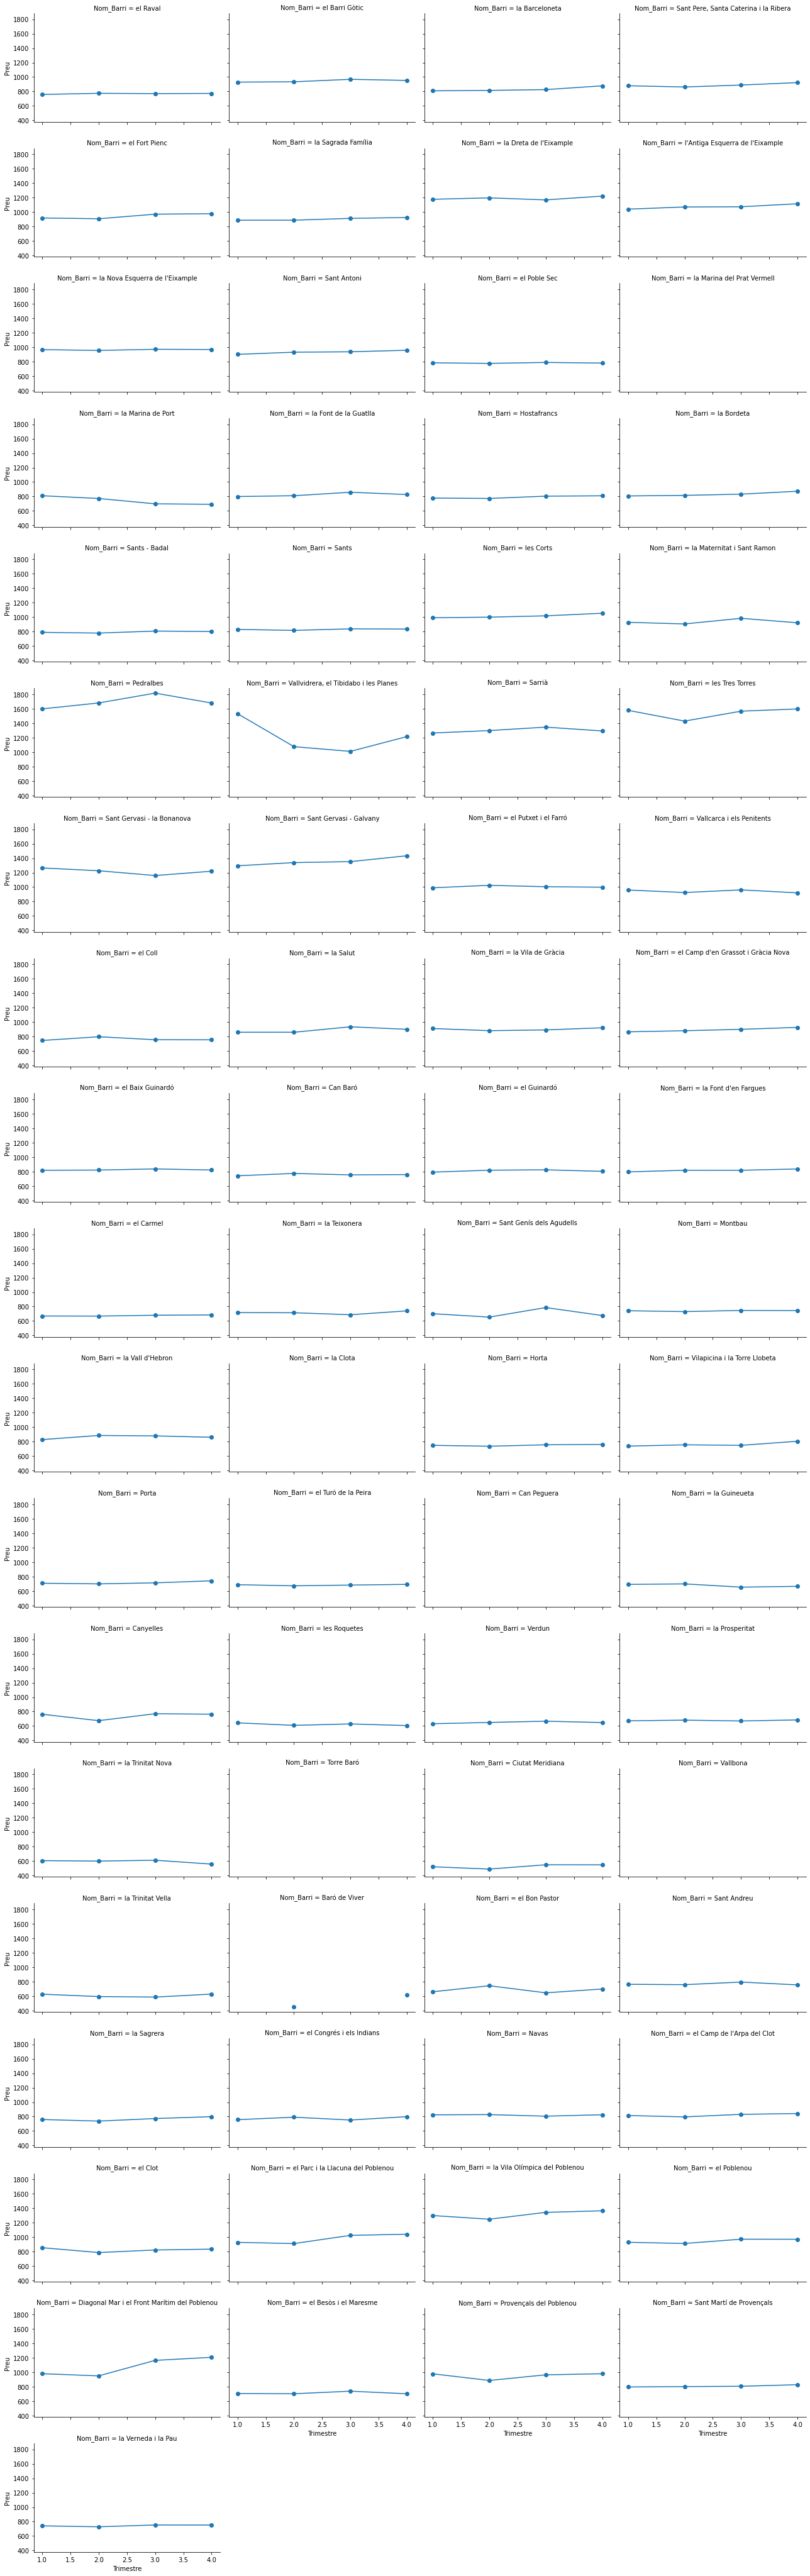

In [18]:
# Veiem per barris, un per un i els valors dels preus per trimestres

barris_fg = sns.FacetGrid(lloguer_data_total, col = 'Nom_Barri', col_wrap = 4, height=3, aspect=1.5)
barris_fg.map(plt.plot,'Trimestre','Preu', marker ='o');